In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-listing-amsterdam/zWFyatkpQgWhcmrZKSIFDw_4743be8d1e1549b28060905e4a4c24f1_listings_m.xlsx
/kaggle/input/listings/listings.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/airbnb-listing-amsterdam/zWFyatkpQgWhcmrZKSIFDw_4743be8d1e1549b28060905e4a4c24f1_listings_m.xlsx')
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210409161549,2021-04-12,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,20210409161549,2021-04-12,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,20210409161549,2021-04-11,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,20210409161549,2021-04-11,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,0363 974D 4986 7411 88D8,t,1,0,1,0,1.94
4,28871,https://www.airbnb.com/rooms/28871,20210409161549,2021-04-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17820,49085366,https://www.airbnb.com/rooms/49085366,20210409161549,2021-04-11,Kloveniers Studio,Great studio to enjoy a couple of days in Amst...,An oasis of calm in the middle of the city of ...,https://a0.muscache.com/pictures/f306ad6d-aa82...,395882585,https://www.airbnb.com/users/show/395882585,...,NaN,NaN,NaN,0363 B62C 0694 FC6B 277F,t,1,0,1,0,NaN
17821,49089176,https://www.airbnb.com/rooms/49089176,20210409161549,2021-04-11,"Prachtig, gerenoveerd appartement in de Pijp!",Dit volledig gerenoveerde appartement is gesch...,NaN,https://a0.muscache.com/pictures/0692f782-b1b3...,68481315,https://www.airbnb.com/users/show/68481315,...,NaN,NaN,NaN,0363 A169 C048 6ED8 1C00,t,1,1,0,0,NaN
17822,49101225,https://www.airbnb.com/rooms/49101225,20210409161549,2021-04-12,Beautiful luxury loft close to city centre,"THIS APARTMENT IS IN TRANSVAALBUURT: ""HAPPY NE...","The apartment is in Transvaalbuurt, a characte...",https://a0.muscache.com/pictures/195f53ba-8e82...,23204045,https://www.airbnb.com/users/show/23204045,...,NaN,NaN,NaN,03631DCF0C172B758647,f,1,1,0,0,NaN
17823,49102514,https://www.airbnb.com/rooms/49102514,20210409161549,2021-04-11,Cedo Nulli Dutch Holiday Boats,Brand new holiday boats with free parking loca...,Marina het Bosch is ideally located in Amsterd...,https://a0.muscache.com/pictures/prohost-api/H...,26206455,https://www.airbnb.com/users/show/26206455,...,NaN,NaN,NaN,Exempt,t,1,1,0,0,NaN


In [3]:
df2 = df[['review_scores_communication', 'review_scores_rating', 'room_type']]
df2

,review_scores_communication,review_scores_rating,room_type
0,10.0,98.0,Private room
1,10.0,89.0,Private room
2,10.0,100.0,Entire home/apt
3,10.0,99.0,Private room
4,10.0,97.0,Private room
...,...,...,...
17820,NaN,NaN,Private room
17821,NaN,NaN,Entire home/apt
17822,NaN,NaN,Entire home/apt
17823,NaN,NaN,Entire home/apt


In [4]:
len(df2)

17825

In [5]:
df2 = df2.dropna()

In [6]:
len(df2)

15176

In [7]:
df2 = df2[(df2['review_scores_communication']>0) & (df2['review_scores_rating']>0)]

In [8]:
df2['review_scores_communication'].min()

2.0

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

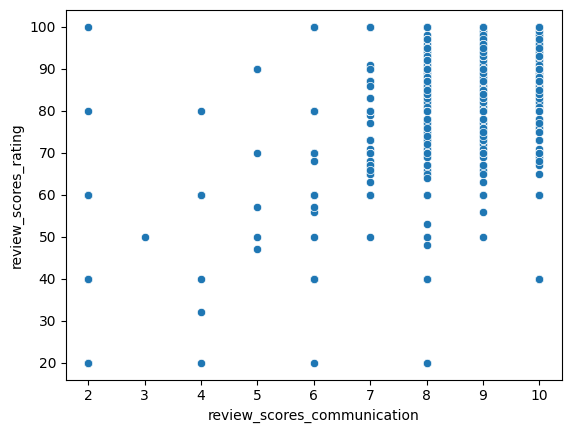

In [10]:
sns.scatterplot(x = df2['review_scores_communication'], y = df2['review_scores_rating'])
plt.show()

In [11]:
corr  = df2[['review_scores_communication', 'review_scores_rating']].corr()
corr

,review_scores_communication,review_scores_rating
review_scores_communication,1.000000,0.658239
review_scores_rating,0.658239,1.000000


In [12]:
df3 = df[['price', 'bedrooms']]
df3

,price,bedrooms
0,59,1.0
1,200,1.0
2,125,1.0
3,141,1.0
4,75,1.0
...,...,...
17820,47,1.0
17821,200,1.0
17822,112,1.0
17823,107,2.0


In [13]:
df3 = df3.dropna()

In [14]:
df3

,price,bedrooms
0,59,1.0
1,200,1.0
2,125,1.0
3,141,1.0
4,75,1.0
...,...,...
17820,47,1.0
17821,200,1.0
17822,112,1.0
17823,107,2.0


In [15]:
df3 = df3[(df3['price'] < 400 )&(df3['bedrooms'] < 5)]
df3

,price,bedrooms
0,59,1.0
1,200,1.0
2,125,1.0
3,141,1.0
4,75,1.0
...,...,...
17820,47,1.0
17821,200,1.0
17822,112,1.0
17823,107,2.0


In [16]:
df3.dtypes

price         int64
bedrooms    float64
dtype: object

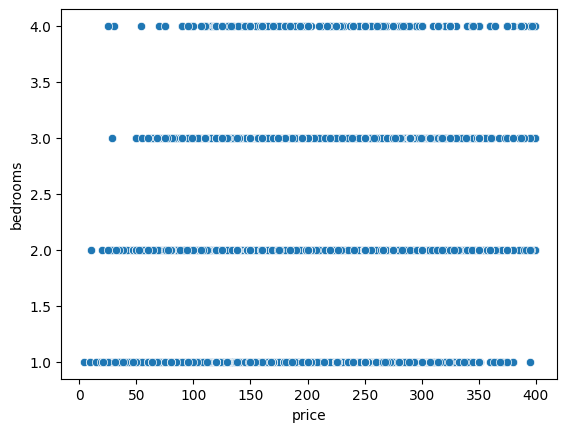

In [17]:
sns.scatterplot(x = df3['price'], y = df3['bedrooms'])
plt.show()

In [18]:
corr_df3 = df3[['price','bedrooms']].corr(method = 'spearman')
corr_df3

,price,bedrooms
price,1.000000,0.467621
bedrooms,0.467621,1.000000
